<a href="https://colab.research.google.com/github/Simeen01/GRIPJanuary22/blob/main/Iris_Flower_Classification_(Task_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Prediction using Unsupervised ML

Author: Simeen Khan
```



**Question:**
From the given Iris dataset, predict the optimum number of clusters and represent it visually.

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load dataset
df = pd.read_csv("/content/drive/MyDrive/Unwanted/Iris.csv", index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


**DETAILS OF THE DATASET**

In [4]:
#no. of rows and columns in dataset
df.shape 

(150, 5)

In [5]:
#first 5 rows of dataframe
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#descriptive statistics of dataset
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Values are non-null, therefore no missing values.

**DATA VISUALIZATION**

*PAIR PLOT*

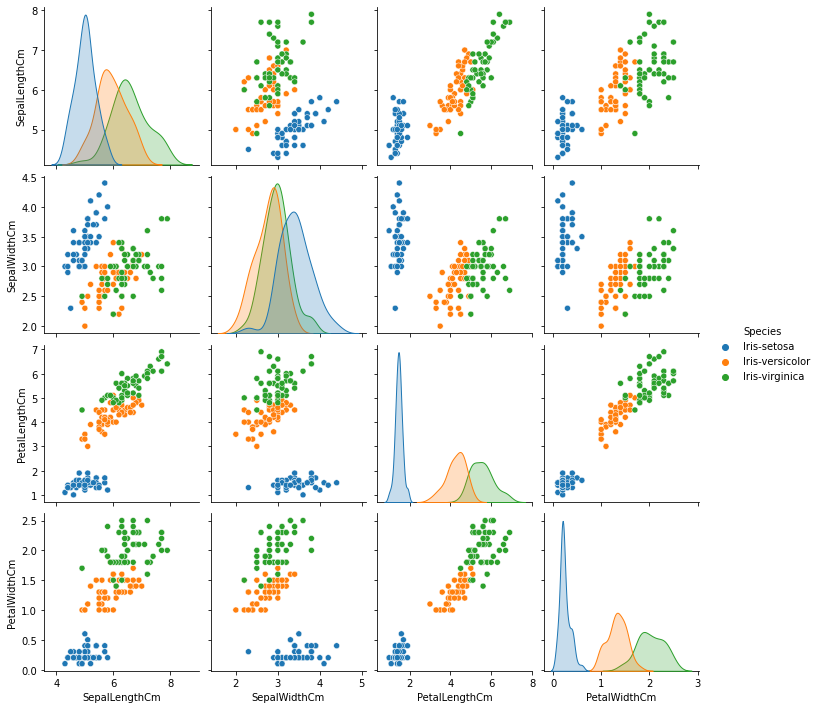

In [8]:
sns.pairplot(df, hue="Species")

*HISTOGRAM*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7605398a10>,
      dtype=object)

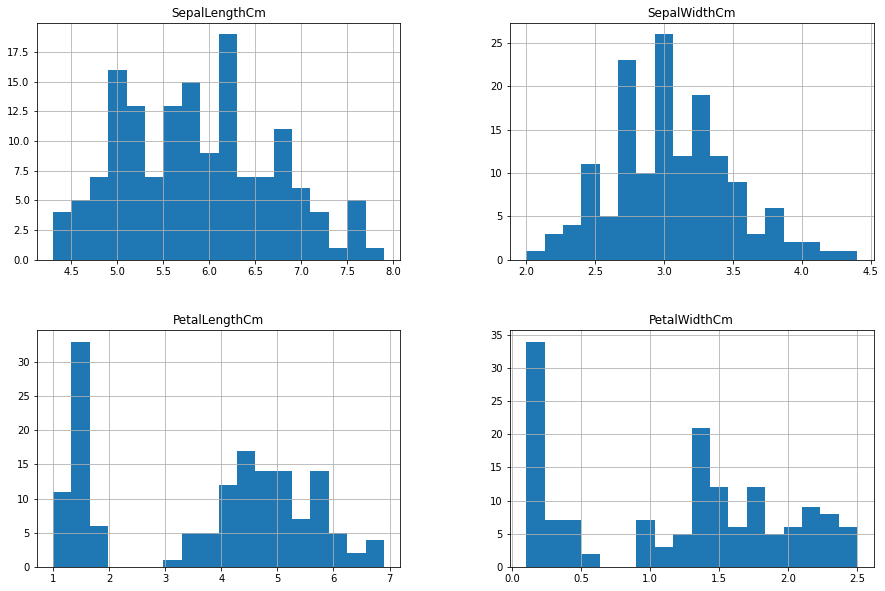

In [9]:
df.hist(bins=18, figsize=(15,10))

*VIOLIN PLOT*

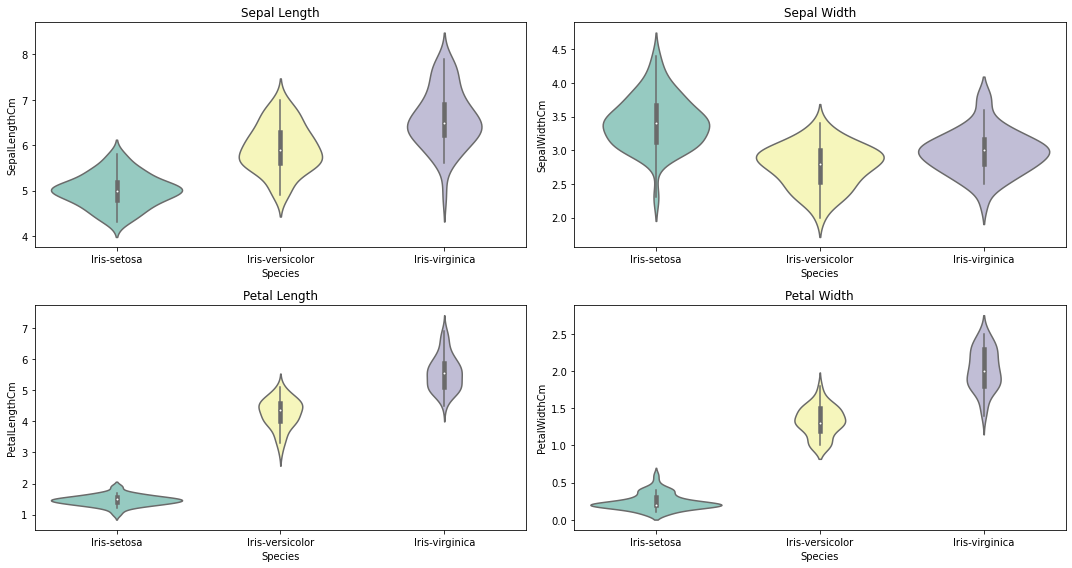

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.title("Sepal Length")
sns.violinplot(y="SepalLengthCm", x="Species", data=df, palette="Set3")
plt.subplot(222)
plt.title("Sepal Width")
sns.violinplot(y="SepalWidthCm", x="Species", data=df, palette="Set3")
plt.subplot(223)
plt.title("Petal Length")
sns.violinplot(y="PetalLengthCm", x="Species", data=df, palette="Set3")
plt.subplot(224)
plt.title("Petal Width")
sns.violinplot(y="PetalWidthCm", x="Species", data=df, palette="Set3")
plt.tight_layout()

*BOX PLOT*

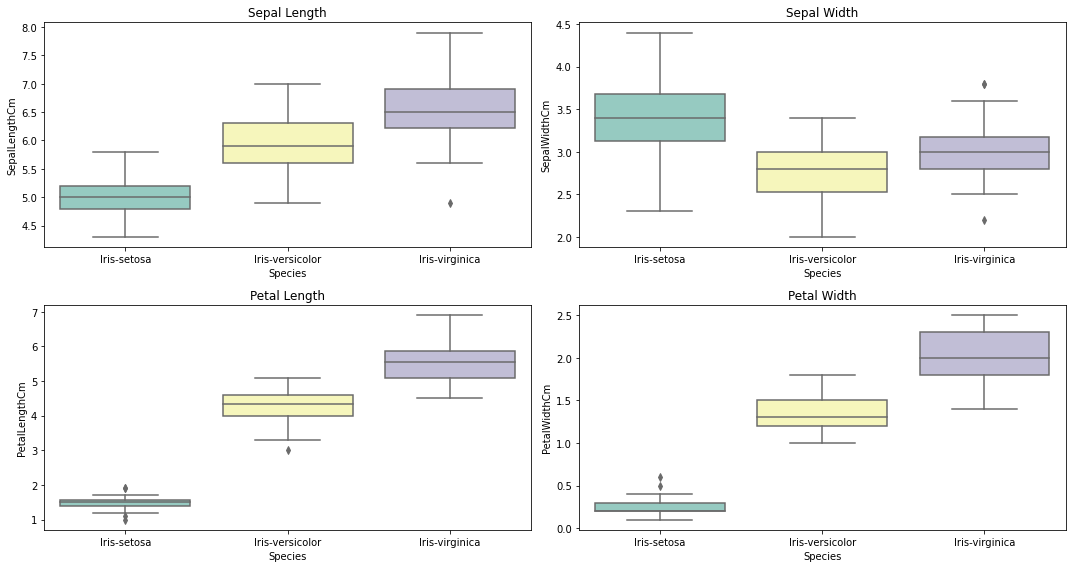

In [11]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.title("Sepal Length")
sns.boxplot(y="SepalLengthCm", x="Species", data=df, palette="Set3")
plt.subplot(222)
plt.title("Sepal Width")
sns.boxplot(y="SepalWidthCm", x="Species", data=df, palette="Set3")
plt.subplot(223)
plt.title("Petal Length")
sns.boxplot(y="PetalLengthCm", x="Species", data=df, palette="Set3")
plt.subplot(224)
plt.title("Petal Width")
sns.boxplot(y="PetalWidthCm", x="Species", data=df, palette="Set3")
plt.tight_layout()

**Correlation of data**

In [12]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


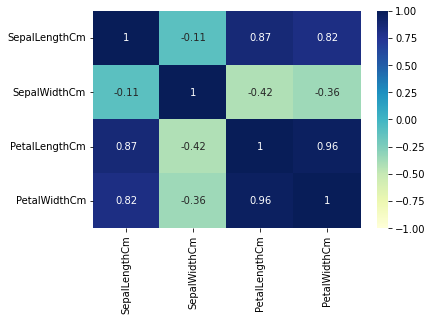

In [13]:
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0, cmap="YlGnBu")

**Data Preparation**

In [20]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

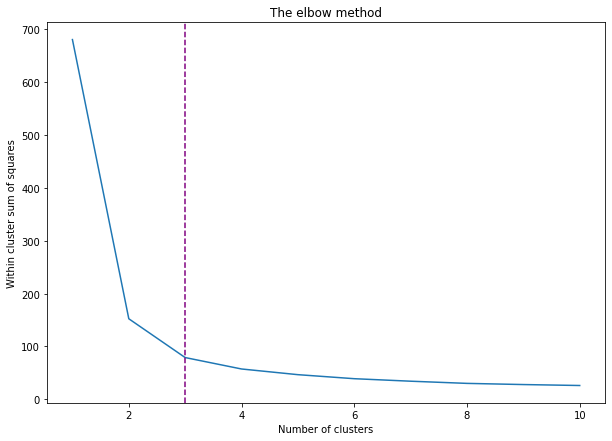

In [29]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize=(10,7)) 
plt.plot(range(1, 11), wcss)
plt.axvline(3,0,1,label='pyplot vertical line', c="purple",linestyle='--')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') 
plt.show()

The elbow is where the best clusters are found. This occurs when the sum of squares within a cluster does not drop considerably with each repetition.

We choose **'3'** as the number of clusters based on this.

In [22]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

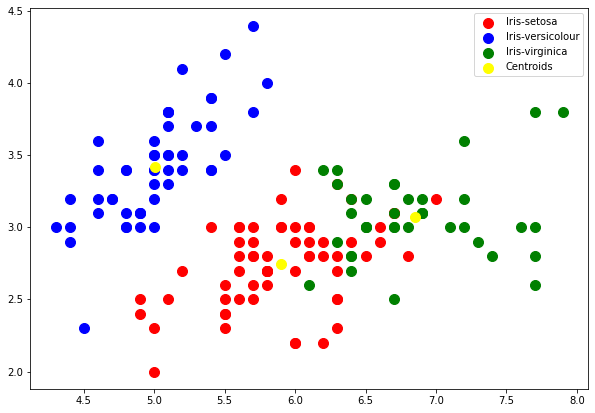

In [23]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,7)) 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

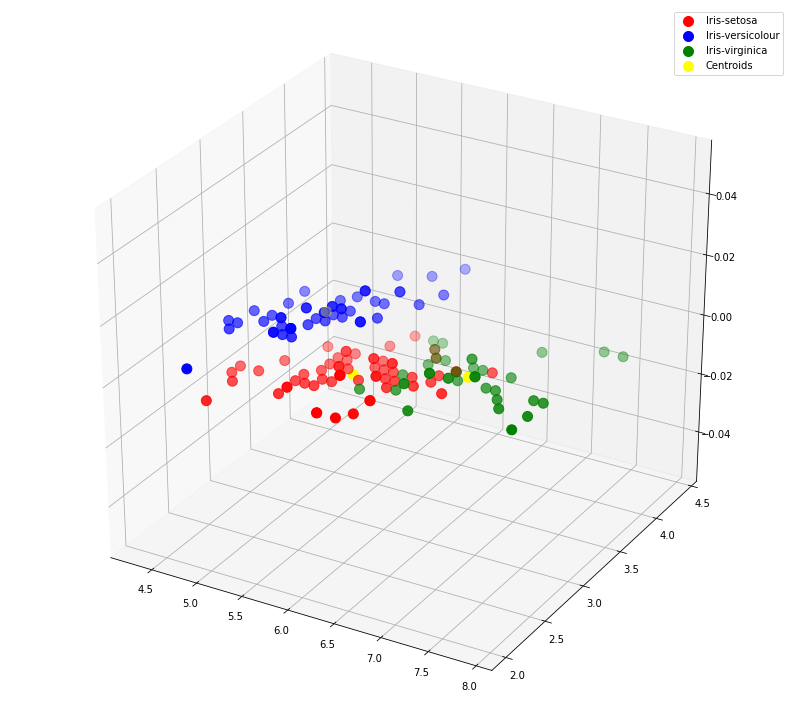

In [24]:
fig = plt.figure(figsize=(14,13)) 
fig.add_subplot(111, projection='3d') #3d figure
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [30]:
y_kmeans = np.where(y_kmeans=='0',"Iris-setosa", y_kmeans)
y_kmeans = np.where(y_kmeans=='1',"Iris-versicolor", y_kmeans)
y_kmeans = np.where(y_kmeans=='2',"Iris-virginica", y_kmeans)

In [32]:
df["Clusters"] = y_kmeans

Text(0.5, 0, 'Distribution')

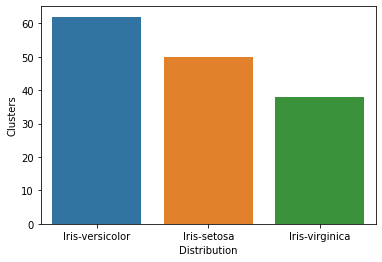

In [33]:
sns.barplot(x=df["Clusters"].unique(), y=df["Clusters"].value_counts(), data=df)
plt.ylabel("Clusters")
plt.xlabel("Distribution")

In [34]:
print(df["Clusters"].value_counts())

Iris-setosa        62
Iris-versicolor    50
Iris-virginica     38
Name: Clusters, dtype: int64


In [35]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])



```
Conclusion:

*   One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.
*   The optimum number of clusters predicted is 3.


```

